David Giacobbi  
Gonzaga University  
CPSC 222, Spring 2022

# Exploratory Data Analysis: Apple Watch Fitness Data

## Introduction

During my first year of college, fitness has been a critical aspect of my daily life and routine. In a place where nearly everything is in walking distance and I have the free time to workout on an ordered schedule, I realized fitness has a large impact on my daily habits. Moreover, I recently got an Apple Watch over Christmas break, so a detailed and accurate analysis of my fitness data was accessible for the Spring 2022 semester.

Fitness data is a large spectrum, so I wanted to focus my project specifically on how certain day attributes affect health and workout activity. Visualizing and testing trends could help answer a few of the following questions:

* Does the type of weather affect the amount I workout?
* Is my workout intensity influenced by the weather?
* How does the day of the week affect how active I am?
* Am I more active on the weekends when I have more free time or does a structured weekday schedule have a greater effect?

In order to answer these questions, data cannot just be extracted from my Apple Watch. In addition to csv files from my Apple Watch, I will utilize an open-source API to create a JSON file of the weather.

Through this exploratory data analysis, I will be able to get a better understanding of just what influences my fitness habits. Information like this could help me improve my daily schedule to workout more effectively as well as find areas in my schedule where fitness could improve. Furthermore, a focused analysis such as this one could draw more general conclusions about how the workout mindset is influenced by both weather and times during the week.

### Load the Data

In order to perform an extensive analysis of my Apple watch data, I need to gather data from various sources so that I can see what exactly influences my fitness activity and what trends I have created over the past semester. The following datasets will be loaded and cleaned for further analysis:

1. Apple Daily Health data (12/26/2021 - 4/12/2022): csv file
1. Apple Workout data (12/26/2021 - 4/12/2022): csv file
1. MeteoStat Daily Weather data: JSON file
1. Days of the Week data: created from `daily_health_data.csv`

#### Loading the CSV Files

The Apple Watch data needs to be uploaded into `Pandas` dataframes so that they can be properly cleaned for analysis. Since this will be the dataframe that the other data files will be surrounded around, date will likely be the joining attribute. This can be done with a few quick lines of code below:

In [396]:
import pandas as pd

daily_health_df = pd.read_csv("daily_health_data.csv")

print(daily_health_df.columns)

Index(['Date', 'Calories', 'Exercise Time (min)', 'Stand Hours',
       'Flights Climbed', 'Heart Rate', 'Max Heart Rate', 'Avg Heart Rate',
       'Rest Heart Rate', 'Step Count', 'Distance (mi) '],
      dtype='object')


The data from the above csv file was retrieved from an application on my iPhone called [Health Auto Export](https://apps.apple.com/us/app/health-auto-export-json-csv/id1115567069). Using an Apple shortcut, Health Auto Export was able to generate an extensive csv file of various health attributes. Each attribute listed above will be cleaned or deleted, depending on its relative performance. The below attributes are the ones that will be kept for further analysis.

* **Date**: unique day instance
* **Calories**: total active calories burned (kcal)
* **Exercise Time**: total exercise time (min)
* **Flights Climbed**: total flights of stairs climbed
* **Max Heart Rate**: highest heart rate reached (bpm)
* **Avg Heart Rate**: average heart rate throughout day (bpm)
* **Rest Heart Rate**: resting heart rate (bpm)
* **Step Count**: total steps taken
* **Distance**: total active distance covered (mi)
  
  
  
The next Apple Watch csv file is workout centered. This file includes data relating to specific workout instances. Date cannot be used as this file's index as there are multiple workouts logged under the same day. However, the start time of the workout is unique and can be used to join with other dataframes.

In [397]:
workout_df = pd.read_csv("workouts_data.csv")
workout_df.rename(columns={"Start": "Date"}, inplace=True)

print(workout_df.columns)

Index(['Type', 'Date', 'End', 'Duration', 'Total Energy (kcal)',
       'Active Energy (kcal)', 'Max Heart Rate (bpm)', 'Avg Heart Rate (bpm)',
       'Distance (mi)', 'Avg Speed(mi/hr)', 'Step Count (count)',
       'Step Cadence (spm)', 'Swim Stroke Count (count)',
       'Swim Stroke Cadence (spm)', 'Flights Climbed (count)',
       'Elevation Ascended (ft)', 'Elevation Descended (ft)'],
      dtype='object')


This workout data was also retrieved using the iPhone app [Health Auto Export](https://apps.apple.com/us/app/health-auto-export-json-csv/id1115567069). The Apple shortcut used to create this csv file did not allow for decisions to be made about which attributes to use. Therefore, half of these attributes will be used for data analysis. Below are the attributes that will be used for further analysis:

* **Date**: date and time of workout start
* **Type**: type of workout completed
* **Duration**: total time of workout (min)
* **Total Energy**: total calories burned in workout (kcal)
* **Max Heart Rate**: highest heart rate reached (bpm)
* **Avg Heart Rate**: average workout heart rate

#### Loading the JSON File

The next data extraction that needs to be completed is the daily weather data for the city of Spokane over the course of this past semester. Found on RapidAPI's website, [MeteoStat's Daily Station API](https://rapidapi.com/meteostat/api/meteostat/) will be used to get a JSON file of the weather data for Spokane from 12/26/2021 - 4/12/2021.

Using [MeteoStat's Station Finder](https://meteostat.net/en/place/us/spokane?t=2022-04-05/2022-04-12&s=KSFF0), Spokane's weather station can be used to create a JSON file with more detailed weather analysis. The code belows uses the above API to get the JSON file, parse through the necessary data, and write it to a `Pandas` dataframe for further analysis:

In [398]:
import json
import requests

weather_url = "https://meteostat.p.rapidapi.com/stations/daily"

weather_key = "48c6248dd3msh5bf7b8a377bd25cp19e73ajsn114ccda534b5"
weather_headers = {"x-rapidapi-key": weather_key}
weather_query = {"station": "KSFF0", "start": "2021-12-26", "end": "2022-04-12", "units": "imperial"}

weather_response = requests.get(url=weather_url, headers=weather_headers, params=weather_query)

# Parse through json object and storel data in dataframe for return
weather_json_obj = json.loads(weather_response.text)
weather_data_list = weather_json_obj["data"]

daily_weather_df = pd.DataFrame(weather_data_list)
daily_weather_df.rename(columns={"date": "Date"}, inplace=True)

print(daily_weather_df)

           Date  tavg  tmin  tmax   prcp  snow   wdir  wspd  wpgt    pres  \
0    2021-12-26  28.2  25.0  32.0  0.043  None  244.0   5.4  None   997.4   
1    2021-12-27  19.4  14.0  25.0  0.024  None  281.0   4.9  None  1006.3   
2    2021-12-28  13.3   8.1  17.1  0.000  None  347.0   2.2  None  1010.2   
3    2021-12-29  13.1   8.1  17.1  0.000  None  324.0   4.2  None  1012.7   
4    2021-12-30  14.9  12.0  17.1  0.177  None    4.0   1.7  None  1006.3   
..          ...   ...   ...   ...    ...   ...    ...   ...   ...     ...   
103  2022-04-08  48.6  39.2  57.2  0.205  None  207.0  12.6  None  1016.0   
104  2022-04-09  40.8  32.0  50.0  0.047  None  228.0  11.7  None  1017.0   
105  2022-04-10  35.2  28.4  44.6  0.039  None  218.0   6.3  None  1012.2   
106  2022-04-11  35.2  28.4  41.0  0.020  None   53.0  11.9  None  1001.2   
107  2022-04-12  36.9  32.0  42.8  0.020  None   59.0  11.1  None  1013.5   

     tsun  
0    None  
1    None  
2    None  
3    None  
4    None  
.. 

In order to compare weather data with health data, date will be the attribute to join. This JSON file provides extensive information about the daily weather; however, some of these attributes do not apply to the cross-analysis with the Apple Watch data. The below attributes will be kept and cleaned for future analysis:

* **date**: unique day instance
* **tavg**: average temperature (Fahrenheit)
* **tmin**: lowest temperature of the day (Fahrenheit)
* **tmax**: highest temperature of the day (Fahrenheit)
* **prcp**: total precipitation (in)
* **wspd**: average wind speed (mi/hr)

#### Creating the Days of the Week Dataframe

The Days of the Week file is important in weekend v. weekday analysis. In order to create a `Pandas` dataframe of this information, the timestamp of each day and days of week need to be added to an empty dataframe. [GeeksForGeeks](https://www.geeksforgeeks.org/python-pandas-date_range-method/#:~:text=date_range()%20is%20one%20of,return%20a%20fixed%20frequency%20DatetimeIndex.&text=Parameters%3A,Right%20bound%20for%20generating%20dates.) and [Stack Overflow](https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python) were used to create this dataframe from scratch.

In [399]:
days_of_week_df = pd.DataFrame()

days_of_week_df["Date"] = pd.Series(pd.date_range('2021-12-26', '2022-04-12', freq='D'))
days_of_week_df["Day of Week"] = days_of_week_df["Date"].dt.day_name()

print(days_of_week_df)

          Date Day of Week
0   2021-12-26      Sunday
1   2021-12-27      Monday
2   2021-12-28     Tuesday
3   2021-12-29   Wednesday
4   2021-12-30    Thursday
..         ...         ...
103 2022-04-08      Friday
104 2022-04-09    Saturday
105 2022-04-10      Sunday
106 2022-04-11      Monday
107 2022-04-12     Tuesday

[108 rows x 2 columns]


### Potential Results

After loading the data, it is clear there are various routes that can be taken in what to classify from this massive dataset. Since, one of the central ideas of this project focuses on how my workout health has been influenced external factors, classifying an external factor could be quite beneficial. Therefore, the time of the week will be classified later based on my daily workout information.

Initially, this project may appear to have very little use to anyone other than myself, given that the data comes from my own health. However, further research from other college students could contribute to a general conclusion about how active health is influenced by weather and time. If any major trends are to arise from my own data anlysis, there is potential that these trends could be present in other students' own health habits. 

## Data Analysis

Now that all of the necessary data has been loaded into dataframes, the data analysis can proceed. After each dataframe has been combed through for missing values, the cleaned sets can then be visualized, joined, and compared. The next part will take the following steps to get a better grasps of relations among the dataframes:

1. Data Cleaning
1. Data Aggregation
1. Data Visualization
1. Hypothesis Testing

### Data Cleaning

As mentioned in the introduction, some of the datasets have unnecessary attributes that clutter the dataset and missing values that need to be filled. This needs to be taken care of before the data can be joined and compared.

#### Daily Health Dataframe

This dataset will delete the following attribute columns due to irrelevance or lack of data points for further analysis:

* Heart Rate
* Stand Hours

In [400]:
daily_health_df.drop("Heart Rate", axis=1, inplace=True)
daily_health_df.drop("Stand Hours", axis=1, inplace=True)

print(daily_health_df.columns)

Index(['Date', 'Calories', 'Exercise Time (min)', 'Flights Climbed',
       'Max Heart Rate', 'Avg Heart Rate', 'Rest Heart Rate', 'Step Count',
       'Distance (mi) '],
      dtype='object')


Now that the unnecessary columns have been deleted, missing values need to be filled. After looking at the data, a couple of different types of data fills will be used. For this dataframe, the following attributes will use this type of fill:

1. **Exercise Time**: fill with `0` since not enough exercise was completed to log
1. **Flights Climbed**: fill with `0` as days without enough elevation gain did not register a flight climbed
1. **Rest Heart Rate**: interpolate middle value since only few days are missing

In [401]:
import numpy as np

daily_health_df["Exercise Time (min)"].fillna(0, inplace=True)

daily_health_df["Flights Climbed"].fillna(0, inplace=True)

daily_health_df["Rest Heart Rate"].interpolate(method="linear", limit_direction="forward", inplace=True)

#### Workout Dataframe

The only cleaning that needs to be completed for the workout dataframe is deletion of columns with non-essential data. Some other columns lack enough data points to be used for statistical analysis. Therefore, the following attributes will be removed from this dataframe:

* End
* Active Energy (kcal)
* Distance (mi)
* Avg Speed (mi/hr)
* Step Count (count)
* Step Cadence (spm)
* Swim Stroke Count (count)
* Swim Stroke Cadence (count)
* Flights Climbed (count)
* Elevation Ascended (ft)
* Elevation Descended (ft)

In [402]:
workout_df.drop("End", axis=1, inplace=True)
workout_df.drop("Active Energy (kcal)", axis=1, inplace=True)
workout_df.drop("Distance (mi)", axis=1, inplace=True)
workout_df.drop("Avg Speed(mi/hr)", axis=1, inplace=True)
workout_df.drop("Step Count (count)", axis=1, inplace=True)
workout_df.drop("Step Cadence (spm)", axis=1, inplace=True)
workout_df.drop("Swim Stroke Count (count)", axis=1, inplace=True)
workout_df.drop("Swim Stroke Cadence (spm)", axis=1, inplace=True)
workout_df.drop("Flights Climbed (count)", axis=1, inplace=True)
workout_df.drop("Elevation Ascended (ft)", axis=1, inplace=True)
workout_df.drop("Elevation Descended (ft)", axis=1, inplace=True)

print(workout_df.columns)

Index(['Type', 'Date', 'Duration', 'Total Energy (kcal)',
       'Max Heart Rate (bpm)', 'Avg Heart Rate (bpm)'],
      dtype='object')


#### Daily Weather Dataframe

Similar to the workout dataframe there is little work that needs to be done in order to prepare it for statistical analysis. There are a few columns that do not have necessary information for visualization, so the following attributes will be removed from the dataframe:

* snow (snow fallen)
* wdir (wind direction)
* wpgt (peak wind gust)
* pres (sea-level air pressure)
* tsun (sunshine total in min)

Additionally, the temperature average has one missing data value, so this will be filled using interpolation.

In [403]:
daily_weather_df.drop("snow", axis=1, inplace=True)
daily_weather_df.drop("wdir", axis=1, inplace=True)
daily_weather_df.drop("wpgt", axis=1, inplace=True)
daily_weather_df.drop("pres", axis=1, inplace=True)
daily_weather_df.drop("tsun", axis=1, inplace=True)

daily_weather_df["tavg"].interpolate(method="linear", limit_direction="forward", inplace=True)

print(daily_weather_df.columns)

Index(['Date', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd'], dtype='object')


### Data Aggregation

In order to properly find trends to visualize and test on, the cleaned dataframes need to be joined and organized by specific attributes. The tricky part to this first join is that the `"Date"` attribute for the daily health is not in a string format. The following code changes this attribute to a string before merging daily health with daily weather:

In [404]:
string_list = []

for i in range(len(daily_health_df["Date"])):
   date_temp = str(daily_health_df["Date"][i])
   date_string = date_temp.split(" ")
   string_list.append(date_string[0])

string_ser = pd.Series(string_list)
daily_health_df["Date"] = string_ser

daily_merged_df = daily_health_df.merge(daily_weather_df, on="Date", how="outer")

print(daily_merged_df.columns)

Index(['Date', 'Calories', 'Exercise Time (min)', 'Flights Climbed',
       'Max Heart Rate', 'Avg Heart Rate', 'Rest Heart Rate', 'Step Count',
       'Distance (mi) ', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd'],
      dtype='object')


The next aggregation that needs to be done is with the day of the week dataframe. The day of the week attribute needs to be added on to both the `daily_merged_df` and the `workout_df`.

In [405]:
daily_merged_df["Day of Week"] = days_of_week_df["Day of Week"]
print(daily_merged_df.columns)

string_list2 = []

for i in range(len(workout_df["Date"])):
   date_temp = str(workout_df["Date"][i])
   date_string = date_temp.split(" ")
   string_list2.append(date_string[0])

string_ser2 = pd.Series(string_list2)
workout_df["Date"] = string_ser2

string_list3 = []

for i in range(len(days_of_week_df["Date"])):
   date_temp = str(days_of_week_df["Date"][i])
   date_string = date_temp.split(" ")
   string_list3.append(date_string[0])

string_ser3 = pd.Series(string_list3)
days_of_week_df["Date"] = string_ser3

workout_merged_df = days_of_week_df.merge(workout_df, on="Date", how="inner")
print(workout_merged_df.columns)

Index(['Date', 'Calories', 'Exercise Time (min)', 'Flights Climbed',
       'Max Heart Rate', 'Avg Heart Rate', 'Rest Heart Rate', 'Step Count',
       'Distance (mi) ', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd',
       'Day of Week'],
      dtype='object')
Index(['Date', 'Day of Week', 'Type', 'Duration', 'Total Energy (kcal)',
       'Max Heart Rate (bpm)', 'Avg Heart Rate (bpm)'],
      dtype='object')


#### Data Preparation Challenges

For my datasets in particular, merging was one fo the major issues. Though the daily health data provided information about my activity every day, the workout dataset only consists of instances in which a workout was performed. This is an issue because there were multiple days where more than one workout was completed; likewise, there were many days in which no workout was logged.

In order to solve this problem, an inner and outer join were completed. One join included the daily health data, days of the week data, and weather data. The other join included the workout data and the days of the week.

Though both the daily health and the workout provide telling information about my overall health and activity, each provide unique attributes that can be analyzed separately. Analyzing each merged dataset with visualizations and hypothesis testing will combine in the end to provide an overarching conclusion about how external factors affect my physical health.

### Data Visualization

Now that data aggregation is complete, the dataset is finally ready to be analyzed statistically. To better understand potential trends, the statistics will be displayed on graphs. Using the `matplotlib` library, a variety of line and bar plots will be drawn to see what connections can be made between fitness and weather/time of week.

#### Active Calories and Average Temperature

The first scatter plot will help to see if there is any correlation between the weather and fitness activity. Though it would seem that one could be less likely to exercise on colder days, my hypothesis is that there is no correlation between the two as I often worked out indoors this semester.

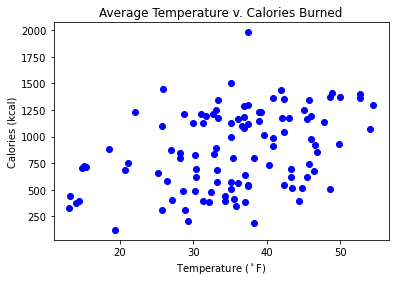

In [412]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(daily_merged_df["tavg"], daily_merged_df["Calories"], color="blue")
plt.title("Average Temperature v. Calories Burned")
plt.xlabel("Temperature ($^\circ$F)")
plt.ylabel("Calories (kcal)")
plt.show()

As predicted, there appears to be little to no correlation between the two attributes. Further statistical testing would need to be carried out to confirm a trend here, given the number of data points.

In order to verify this correlation assumption, a line of best fit should be drawn through the data. Analyzing the correlation value ($r$), a number will statistically identify how much of a relationship there is between the two variables. The closer the number is to 1.0, the more of a relationship there is between the temperature and calories burned.

r (correlation value): 0.3818041776940187
Linear Equation: y = 14.87x + 340.02


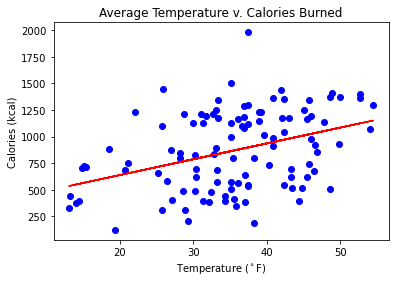

In [413]:
from scipy import stats

x_ser = pd.Series(daily_merged_df["tavg"])
y_ser = pd.Series(daily_merged_df["Calories"])

m, b, r, r_pval, std_err = stats.linregress(x_ser, y_ser)

print("r (correlation value):", r)
print("Linear Equation: y = ", round(m, 2), "x + ", round(b, 2), sep="")

plt.figure()
plt.plot(x_ser, m*x_ser + b, color="red")
plt.scatter(daily_merged_df["tavg"], daily_merged_df["Calories"], color="blue")
plt.title("Average Temperature v. Calories Burned")
plt.xlabel("Temperature ($^\circ$F)")
plt.ylabel("Calories (kcal)")
plt.show()

#### Exercise Time and Average Temperature

Calories do not tell the whole story about how my physical activity is influenced by weather. In order to get a better idea of this, the average daily temperature needs to be analyzed with another health factor: Exercise Time (min). By checking the correlation value of this relationship, a better conclusion can be drawn about the potential of causation between weather and activity.

r (correlation value): 0.4692152542948338
Linear Equation: y = 2.06x + -4.9


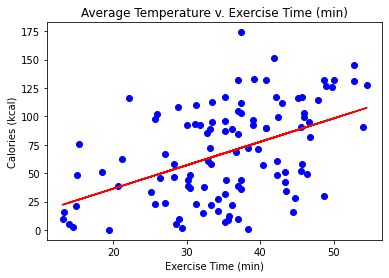

In [414]:
from scipy import stats

x_ser = pd.Series(daily_merged_df["tavg"].fillna(0))
y_ser = pd.Series(daily_merged_df["Exercise Time (min)"].fillna(0))

m, b, r, r_pval, std_err = stats.linregress(x_ser, y_ser)

print("r (correlation value):", r)
print("Linear Equation: y = ", round(m, 2), "x + ", round(b, 2), sep="")

plt.figure()
plt.scatter(x_ser, y_ser, color="blue")
plt.plot(x_ser, m*x_ser + b, color="red")
plt.title("Average Temperature v. Exercise Time (min)")
plt.xlabel("Exercise Time (min)")
plt.ylabel("Calories (kcal)")
plt.show()

This scatter plot almost seems to confirm my hypothesis that there is little correlation between weather and my fitness activity. The correlation value tells that there is some connection between the two factors; however, it is fairly low to be considered. Further testing will be required to confirm this hypothesis.

#### Day of Week v. Workout Duration

The next trend that should be further analyzed is how the day of the week affects my fitness. For this visualization, a bar chart will work best in depicting how average workout duration changes depending on the day.

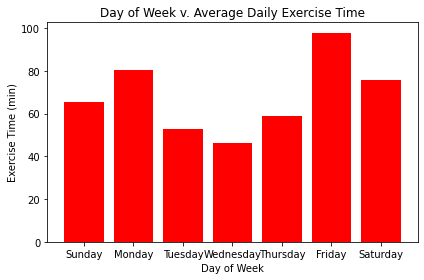

In [415]:
grouped_day_df = daily_merged_df.groupby("Day of Week")

day_list = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
mean_exer_ser = pd.Series(dtype=int)

for day, day_df in grouped_day_df:
    group_mean_data = day_df["Exercise Time (min)"].mean()
    mean_exer_ser[day] = group_mean_data

plt.figure()
plt.bar(day_list, mean_exer_ser, color="red")
plt.title("Day of Week v. Average Daily Exercise Time")
plt.xlabel("Day of Week")
plt.ylabel("Exercise Time (min)")
plt.tight_layout()
plt.show()

This bar chart provides some telling information about how my week plays out. It appears that my week takes this gradual dip during the middle of the week. However, at the start and end of the week, I seem to have the most energy to go and workout for longer durations.

#### Day of Week v. Total Calories Burned

Exercise time, however, does not tell the whole story. The Apple Watch always logs time when you are active. This includes, and is not limited to, light cardio activities such as walking and climbing stairs during the day. In order to get a better gauge of how fitness-focused time is affected by the day of the week, the workout dataframe needs to be used. This next bar chart will compare the total calories burned in focused workouts throughout the week.

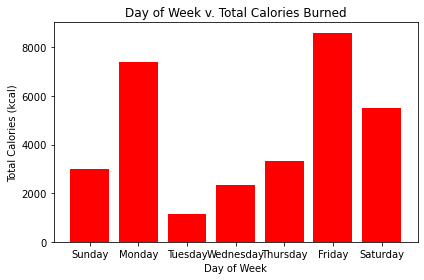

In [416]:
grouped_day_df2 = workout_merged_df.groupby("Day of Week")

day_list = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
avg_ener_ser = pd.Series(dtype=float)

for day, day_df in grouped_day_df2:
    group_mean_data2 = day_df["Total Energy (kcal)"].sum()
    avg_ener_ser[day] = group_mean_data2

plt.figure()
plt.bar(day_list, avg_ener_ser, color="red")
plt.title("Day of Week v. Total Calories Burned")
plt.xlabel("Day of Week")
plt.ylabel("Total Calories (kcal)")
plt.tight_layout()
plt.show()

Similar to the previous bar chart, there is a similar shape to this one. The majority of active calories are burned during the ends of the week while the middle has the lowest calorie totals. This is a surprise to me as I expected the weekday to have the highest calorie numbers, which is when I typically have time to go to the gym.

### Hypothesis Testing

Hypothesis tests are a great way to statistically test hypotheses about potential trends in the data. They can help provide evidence for certain conclusions, depending on if the null hypothesis is rejected or not. The following hypothesis tests will attempt to provide support for these topics:

1. Friday Active Calorie Mean v. Rest of Week Active Calorie Mean

#### Active Calorie Means Test

This first hypothesis test will try to answer the question: Is my active calories mean greatest on Fridays compared to the other days of the week?
In order to answer this, a two independent sample test of means will be used. A level of significance 0.05 will be used.

**Hypothesis Formualtion:**

$H_0$ = $\mu_{Friday} <= \mu_{Rest of Week}$  
$H_1$ = $\mu_{Friday} > \mu_{Rest of Week}$  
$\mu$ = average active calories burned  

**Calculations:**

$\alpha = 0.05$  
$df = n_1 + n_2 - 2 = 106$  
$t_{critical} = 1.6594$  

T-Statistic for Two-Sample Independent Test of Means:
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

In [417]:
from scipy import stats

friday_list = []
rest_week_list = []

for i in range(len(daily_merged_df["Day of Week"])):

    if daily_merged_df.loc[i]["Day of Week"] == "Friday":
        friday_list.append(daily_merged_df.loc[i]["Calories"])

    else:
        rest_week_list.append(daily_merged_df.loc[i]["Calories"])

friday_ser = pd.Series(friday_list)
rest_week_ser = pd.Series(rest_week_list)

t, pval = stats.ttest_ind(friday_ser, rest_week_ser)
pval /= 2
print("t:", t, "pval:", pval)

if t > 1.6594:
    print("Reject Null Hypothesis")
else:
    print("Do Not Reject Null Hypothesis")

t: 0.08232415215434889 pval: 0.46727210141202535
Do Not Reject Null Hypothesis


**Conclusion**

Given a level of significance of 0.05, there is not sufficient evidence to reject the hypothesis that the other days of the week have a greater than or equal daily calorie mean than Friday does. This means that Friday cannot be confirmed as the most active day, calorie-wise, over the other days of the week.